# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [103]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [104]:
pwd

'C:\\Users\\admin\\Desktop\\SPRINGBOARDFILES\\Unit 6\\GuidedCapstoneStep6HL'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [105]:
#Model 3
df=pd.read_csv(r'C:\Users\admin\Desktop\SPRINGBOARDFILES\Unit 6\GuidedCapstone_Step2_data_Wrangling.ipynb\data\step4&5_output.csv')


In [106]:
dfo=df.select_dtypes(include=['object'])


In [107]:
from  sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Unnamed: 0','Name','AdultWeekend'], axis=1)
X =  X.drop(X.loc[:,'Alaska':'Wyoming'],axis=1)
X =  X.drop(['summit_elev'],axis=1)
print(X.columns)
# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler1 = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler1.transform(X) 

Index(['vertical_drop', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'projectedDaysOpen', 'NightSkiing_ac', 'clusters'],
      dtype='object')


In [108]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()
print(y)
# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train,y_test= train_test_split(X_scaled, y, test_size=0.25, random_state=1)

[34.         78.         47.         64.16681004 78.         75.
 64.16681004 59.         84.         83.         64.16681004 79.
 50.         69.         89.         56.         84.         65.
 65.         60.         55.         62.         42.         42.
 47.         32.         47.         64.16681004 43.         55.
 35.         40.         45.         52.         39.         40.
 46.         43.         55.         49.         32.         75.
 79.         68.         45.         40.         64.16681004 47.
 35.         65.         49.         49.         64.16681004 49.
 34.         45.         45.         45.         35.         42.
 45.         64.16681004 45.         47.         44.         37.
 58.         35.34       48.         59.         49.         47.
 39.         50.         47.         70.         89.         59.
 64.16681004 50.         92.         58.         93.         72.
 93.         45.         89.         64.16681004 77.         20.
 49.         79.         

In [109]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [110]:
y_pred=model.predict(X_test)
y_pred

array([80.64914133, 55.69426024, 58.05625499, 65.33235986, 49.93014441,
       55.15166533, 66.97919156, 73.72734002, 49.68974052, 56.09908025,
       82.10414705, 74.99109618, 60.99455543, 75.10613776, 31.47703321,
       59.00134864, 47.16714653, 50.24115433, 53.91114144, 44.84540564,
       58.16119826, 69.94520554, 60.93148575, 52.98322722, 42.74753997,
       40.79487513, 53.6180587 , 55.26966388, 75.02519268, 39.94511374,
       52.50799915, 75.99950244, 85.56800309, 68.60849285, 55.66491336,
       54.64168396, 34.12845963, 69.59441309, 53.55668916, 43.77450563,
       32.80370832, 44.16426288, 50.67405788, 38.80188111])

In [111]:
from sklearn.metrics import  explained_variance_score
from sklearn.metrics import  mean_absolute_error
print(explained_variance_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.7575113146332111
6.502592301742859


In [112]:
y_pred = model.predict(X_test)
print(y_pred)

[80.64914133 55.69426024 58.05625499 65.33235986 49.93014441 55.15166533
 66.97919156 73.72734002 49.68974052 56.09908025 82.10414705 74.99109618
 60.99455543 75.10613776 31.47703321 59.00134864 47.16714653 50.24115433
 53.91114144 44.84540564 58.16119826 69.94520554 60.93148575 52.98322722
 42.74753997 40.79487513 53.6180587  55.26966388 75.02519268 39.94511374
 52.50799915 75.99950244 85.56800309 68.60849285 55.66491336 54.64168396
 34.12845963 69.59441309 53.55668916 43.77450563 32.80370832 44.16426288
 50.67405788 38.80188111]


In [113]:
df3 = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

In [114]:
print(lm.intercept_)

56.79826953002002


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

Since "Big Mountain resort" not present in the proided csv file we are taking any random resort from the given list of resorts. 

In [115]:

df_random=df[df['Name'].str.contains('Monarch Mountain')]

df_random=df_random.drop(['Unnamed: 0'], axis=1)
df_random

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
14,Monarch Mountain,11952,1162,0,0.0,0,0,1,0,4,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df_random['AdultWeekend']

14    89.0
Name: AdultWeekend, dtype: float64

In [117]:
X = df_random.drop(['Name','AdultWeekend','Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Dakota', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming','summit_elev'], axis=1)

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

Change in values of some columns

In [118]:
X['AdultWeekday']=110

In [119]:
X['daysOpenLastYear']=300

In [136]:
X['projectedDaysOpen']=180

In [137]:
from  sklearn import preprocessing
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler2 =preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler1.transform(X) 
print(X_scaled)


[[ 5.55966697e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.04850659e-01  6.59694261e-01 -9.77139836e-01  1.53745589e+00
  -1.88271306e-01  3.69007617e-01  1.97829488e+00  1.64265853e-01
  -6.83795790e-03  1.99869768e+00 -1.15276374e+00  8.84566342e+00
   1.44927738e+00  1.93803490e+00  3.74245236e+00  3.20951527e+00
  -9.39786486e-01 -5.80506485e-01]]


In [138]:
#y_pred=model.predict(X_scaled)
print(model.predict(X_scaled))


[93.21549833]


In [139]:
df_random['AdultWeekend']

14    89.0
Name: AdultWeekend, dtype: float64

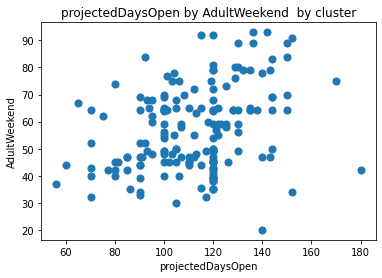

In [143]:
plt.scatter(df['projectedDaysOpen'], df['AdultWeekend'], s=50, cmap='viridis')
plt.xlabel('projectedDaysOpen')
plt.ylabel('AdultWeekend')
plt.title('projectedDaysOpen by AdultWeekend  by cluster')
plt.savefig('fig1.png',bbox_inches='tight')

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

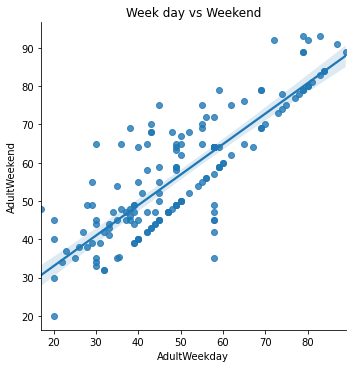

In [141]:
sns.lmplot(x='AdultWeekday',y='AdultWeekend', data=df)
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('Week day vs Weekend')
plt.savefig('fig2.png',bbox_inches='tight')

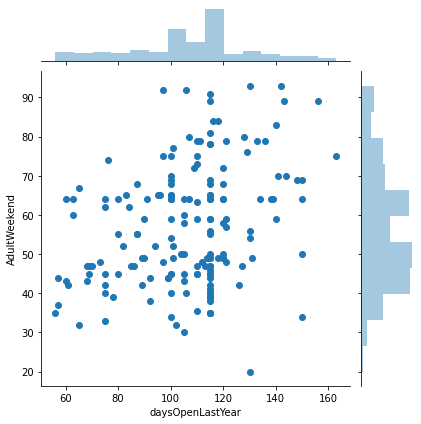

In [142]:
sns.jointplot(x='daysOpenLastYear',y='AdultWeekend',data=df,kind='scatter')
plt.savefig('fig3.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [127]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'regression_model_adultweekend.joblib') 

['regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [128]:
df3['Mean Absolute Error'] = mean_absolute_error(y_test,y_pred)

In [129]:

df3['Explained Variance Score'] = explained_variance_score(y_test,y_pred)

In [130]:
pwd

'C:\\Users\\admin\\Desktop\\SPRINGBOARDFILES\\Unit 6\\GuidedCapstoneStep6HL'

In [131]:
df3.to_csv(r'C:\\Users\\admin\\Desktop\\SPRINGBOARDFILES\\Unit 6\\GuidedCapstoneStep6HL\model_summary.csv')


In [132]:
df3

,Coefficient,Mean Absolute Error,Explained Variance Score
vertical_drop,2.405747e+00,6.502592,0.757511
trams,0.000000e+00,6.502592,0.757511
fastEight,1.776357e-15,6.502592,0.757511
fastSixes,2.220446e-16,6.502592,0.757511
fastQuads,1.742994e-01,6.502592,0.757511
quad,1.273148e+00,6.502592,0.757511
triple,1.403223e+00,6.502592,0.757511
double,9.220875e-01,6.502592,0.757511
surface,1.055424e+00,6.502592,0.757511
total_chairs,8.534673e-01,6.502592,0.757511
